### 선형회귀 진단과 모델링 (StatsModels 라이브러리 사용)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import pylab
import scipy.stats as st
from sklearn.datasets import load_boston
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

#### 1. Load the 'Boston' dataset from Scikit-Learn and convert it into a DataFrame:

In [2]:
data = load_boston()

In [3]:
# The explanatory variables.
X = data['data']
header = data['feature_names']

In [4]:
# The response variable.
Y = data['target']
Y = Y.reshape(-1, 1)

In [5]:
# Transform into a DataFrame.
df = pd.DataFrame(np.append(X,Y,axis = 1))
df.columns = list(header) + ['PRICE']

In [6]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### 2. Linear modeling using R-styled formula:

In [18]:
# Using all the explanatory variables.
my_model = smf.ols(formula = "PRICE ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT ", data=df)
my_model = my_model.fit()
my_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          6.72e-135
Time:                        09:29:44   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
print(dir(my_model))

['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', '_HCCM', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_data_attr', '_get_robustcov_results', '_is_nested', '_use_t', '_wexog_singular_values', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'diagn', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 'get_prediction', 'get_robustcov_results', 'initialize', 'k_constant', 'llf', 'load', 'model', 'mse_model', 'mse_resid', 'mse_total', 'nobs', 'normalized_c

In [9]:
# Display the parameters.
my_model.params

Intercept    36.459488
CRIM         -0.108011
ZN            0.046420
INDUS         0.020559
CHAS          2.686734
NOX         -17.766611
RM            3.809865
AGE           0.000692
DIS          -1.475567
RAD           0.306049
TAX          -0.012335
PTRATIO      -0.952747
B             0.009312
LSTAT        -0.524758
dtype: float64

In [10]:
# Variance Inflation Factors.
vifs = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
pd.Series(vifs, index=header)

CRIM        2.100373
ZN          2.844013
INDUS      14.485758
CHAS        1.152952
NOX        73.894947
RM         77.948283
AGE        21.386850
DIS        14.699652
RAD        15.167725
TAX        61.227274
PTRATIO    85.029547
B          20.104943
LSTAT      11.102025
dtype: float64

**NOTE: INDUS and AGE do not seem to be significant. Adjusted $R^2 = 0.734$ and $AIC = 3026$.** 

In [11]:
# Dropping the explanatory variables 'INDUS' and 'AGE'.
my_model = smf.ols(formula = "PRICE ~ CRIM + ZN + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT ", data=df)
my_model = my_model.fit()
my_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          5.54e-137
Time:                        09:17:31   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.000      26.385      46.298
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
RM             3.8016      0.406      9.356      0.000       3.003       4.600
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
B              0.0093      0.003      3.475      0.001       0.004       0.015
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**NOTE: All the explanatory variables are significant. Adjusted $R^2 = 0.735$ and $AIC = 3022$.** 

**CONCLUSION: The second model is slightly optimized compared to the first one.**

#### 3. Diagnostics and Residual Analysis:

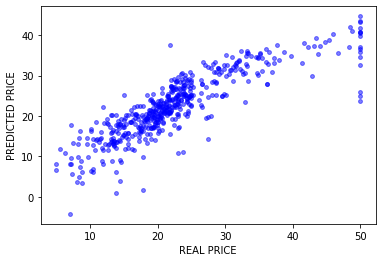

In [12]:
# Display real Y vs predicted Y.
plt.scatter(df.PRICE,my_model.fittedvalues,c = 'blue', s=15, alpha=0.5)
plt.xlabel('REAL PRICE')
plt.ylabel('PREDICTED PRICE')
plt.show()

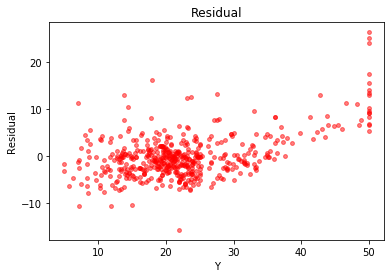

In [13]:
# Q: Can you check "visually" that the mean = 0 and variance = constant for the residuals?
plt.scatter(df.PRICE, my_model.resid,c = 'red', s=15, alpha=0.5)
plt.xlabel('Y')
plt.ylabel('Residual')
plt.title('Residual')
plt.show()

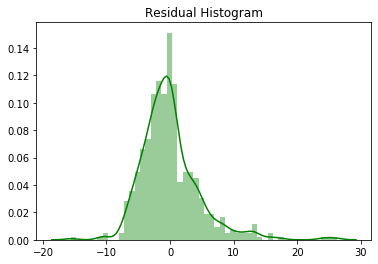

In [14]:
# Q: Are the residuals normally distributed centered around 0?
sns.distplot(my_model.resid, bins=50, color='green').set_title("Residual Histogram")
plt.show()

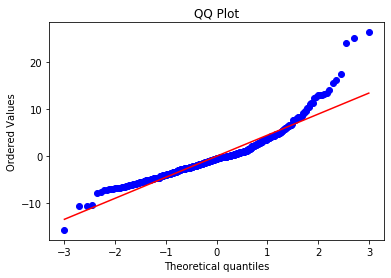

In [15]:
# Use the QQ Plot to check for nomality.
# Using the residuals display the observed quantiles vs theoretical quantiles.
st.probplot(my_model.resid, dist = 'norm', plot = pylab)
plt.title('QQ Plot')
plt.show()

#### 4. Given a new set of values for the explanatory variables, predict the response:  
- CRIM     : 0.03
- ZN       : 0.0
- INDUS    : 13.0
- CHAS     : 0.0
- NOX      : 0.4
- RM       : 4.3
- AGE      : 23.5
- DIS      : 1.9
- RAD      : 1.0
- TAX      : 273.0
- PTRATIO  : 18.0 
- B        : 380.0
- LSTAT    : 7.5

In [16]:
X_new = { 'CRIM' : 0.03, 'ZN' : 0.0 , 'INDUS' : 13.0, 'CHAS' : 0.0, 
'NOX' : 0.4, 'RM' : 4.3, 'AGE' : 23.5, 'DIS' : 1.9, 'RAD' : 1.0,
'TAX' : 273.0, 'PTRATIO' : 18.0, 'B' : 380.0, 'LSTAT' : 7.5}
Y_pred_new = my_model.predict(X_new)
print(np.round(Y_pred_new.values[0],3))

22.556
